# Lab 04 - k-Nearest Neighbors

Submitted By: Julian Singkham  
Date: OCT 04 2021

# Abstract

The purpose of this lab is to familiarize ourselves with feature selection for decision boundaires and benchmarking decision bondary accuracy. Additinonally, at the end of the lab we were introduced to splitting a data set into training, testing, and validation sets to see how decision boundary accuracy is affected.

The purpose of this lab is to familiarize ourselves with creating and using the KNN algorithm, visually creating decision boundaries, splitting training and testing sets and evaluating model accuracy. Creating the KNN algorithm wasn't difficult for me as I created a similar version in CS2300 - Computational Science. The second part of the lab involved evaluating the model by testing it with a 2D grid of 300x300 points. Plotting this grid created a visual boundary line, and when compared to the data set we could see how accurately the KNN model fitted to the data. Cross-fold validation was used to verify the accuracy of the K-value by diversifying the training and testing sets. This greatly aided in validating the accuracy of the model as we effectively created 10 data sets from one.

* The first part of the lab involved implementing the KNN algorithm with as little looping as possible to improve efficiency.
* The second part of the lab involved exploring the decision boundaries of three data sets after running them through the KNN algorithm. A contour plot was also created to give additional insights on the gradience of the decision boundary.
* The third part of the lab involved comparing different K values and using cross-fold validation to verify the accuracy of the model.

The Moons data set decision boundary follows the shape of the dataset, but is slightly shifted down and to the left. I suspect this is due to scaling the evaluation set as the evaluation set covers X = -4,2.8 instead of 3,3.

The Circles data set decision boundary follows a circular pattern and follows the outline of the data points. If the training set had more data points I beleive the decision boundary would decrease in size and more accurately follow the flow of data.

The Rocky Ridge data set had the worst performance of the three as the majority of the data points are outside of the evaluation bounds. I believe this is caused by scaling as this problem is remediated by removing the scale. Outside of this, the decision boundary does accurately divide the data points that are on the evaluation boundaries

The data utilized in this lab is the Moons, Circles, and Rocky Ridge data sets provided by Dr. Salami.

# Reflection Questions

### Problem 1: KNN Implementation
1. Estimate the run time complexity in big-o notation of training a KNN model. Justify your answer. 

O(1) due to KNN saving the reference points during training. Copying data has consistant complexity.

2. Estimate the run time complexity in big-o notation of predicting the output value for a query point using a training set of N points, with p features, and k neighbors with a KNN model. Justify your answer.

O(k*p*n) where k is the number of neighbors, p is dimensionality, and n is the number of points. K is a multiplyer because the number of distance calulations increases with K. K=2 means the distance needs to be calculated twice for every data point, k=3 is three times for every data point. Like K, P is a multiplyer because the distance equation complexity increases with P.

3. What do you think the potential downsides of the k nearest neighbors algorithm are? Why do you think it might not be used as widely as other methods?

Two potential downsides to KNN is space usage and speed. Since KNN stores its training data, KNN is unpractical with large datasets. KNN is also quite slow as evident in question 2. Using complex and large data sets in KNN makes it computationally and spacially expensive when compared to other algorithms.

### Problem 2: Decision Boundaries 
1. For each of the three data sets, do you think a linear decision boundary could be used to accurately classify the data points?

The Rocky Ridge data set is the only data set that could be used with a linear decision boundary. The Circles data set can be split with a ring as label 0 encapsulates label 1. The Moons data can be split with a curved

2. What do we mean by a "non-linear" decision boundary? Give an example of a non-linear function that could be used as a decision boundary for one of the data sets.

Non-linear decision boundary is a decision boundary who's value does not match mx+b. The Circles data set can be split with a ring as label 0 encapsulates label 1

3. What are the advantages of non-linear decision boundaries over linear decision boundaries? What are the disadvantages?

Non-linear decision boundaries are great for fine tuning as most data sets don't contain a clear divide between labels. Likewise, this also poses a downside as the non-linear decision boundary can easily be made to overfit with the data.

### Problem 3: Choosing an Optimal Value for k
1. What value of k gave the highest accuracy?

K=31 

2. For large values of k, what happened to the accuracy? Why do you think this is?

Accuracy decreased greatly after k=61 and stabilized at K=101 with an accuracy of 78%. I believe that at high K values, KNN becomes biased towards the most prevelant label as the likely hood of neighbors being the dominent label increases.

3. Let's say that we ask you to use the following experimental setup to find a value of k that maximizes the accuracy of the model's predictions: split the data set into training and testing sets, train a model for each value of k using the training set, predict the classes of the testing points, and evaluate the accuracy of the predictions. Could this approach give you misleading results? If so, why?

This is misleading as the K value found is the most accurate for that particular training set. Since the training and testing set are the same, this creates bias as KNN is only exposed to a singular training set.

4. It is considered a "best practice" to use cross-fold validation when optimizing parameters. Why do you think that is?

I believe this aids with data diversity as cross-fold validation creates n amounts of additional training/test sets.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from knn import KNN
from test_knn import TestKNN
import matplotlib.pyplot as plt
import numpy as np

### Explore Decision Boundaries for 3 Data Sets
#### Moons Data Set

##### a. Split the data set into training and testing sets

In [2]:
# Import csv to numpy array
np_moons = np.loadtxt(open('moons.csv', "rb"), delimiter=",", skiprows=1)

# Split the data set
train_X, test_X, train_y, test_y = train_test_split(np_moons[:,1:3], np_moons[:,0], stratify = np_moons[:,0])

##### b. Train the StandardScaler transformer on the training set. Use it to transform the features for the training and testing sets.

In [3]:
# Scale the data set
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

##### c. Fit a KNN model with 3 neighbors and using the mode function for aggregation on the training set

In [4]:
# Runn KNN
knn = KNN(3, "mode")
knn.fit(train_X, train_y)
np_moons_predictions = knn.predict(test_X)

# Sort by label
np_moons = np_moons[np.argsort(np_moons[:, 0])]

##### d. Evaluate the model for each point on a 2D grid. The grid should span from -3 to 3 on the x axis and -3 to 3 on the y axis with a point every 0.02 units.

Text(0, 0.5, 'Feature: Y')

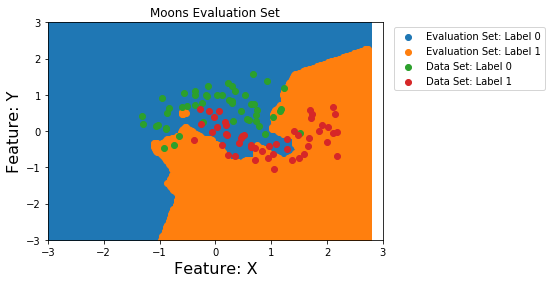

In [5]:
# Generate evaluation set
x = np.arange(-3, 3, 0.02)
x1, x2 = np.meshgrid(x,x)
np_evaluation_X = np.array([x1.flatten(), x2.flatten()]).T

# Scale the data set
np_evaluation_X = scaler.transform(np_evaluation_X)

# Runn KNN
np_evaluation_predictions = knn.predict(np_evaluation_X)

# Sort by label
np_evaluation_predictions = np_evaluation_predictions[:,np.newaxis]
np_evaluation = np.concatenate((np_evaluation_X, np_evaluation_predictions), 1)
np_evaluation = np_evaluation[np.argsort(np_evaluation[:, 2])]

# Plot evaluation set
plt.title("Moons Evaluation Set")
evaluation_sorted_index = np.where(np_evaluation[:,2]==1)[0][0]
moons_sorted_index = np.where(np_moons[:,0]==1)[0][0]
plt.scatter(np_evaluation[:evaluation_sorted_index,0], np_evaluation[:evaluation_sorted_index,1], label="Evaluation Set: Label 0")
plt.scatter(np_evaluation[evaluation_sorted_index:,0], np_evaluation[evaluation_sorted_index:,1], label="Evaluation Set: Label 1")
plt.scatter(np_moons[:moons_sorted_index,1], np_moons[:moons_sorted_index,2], label="Data Set: Label 0")
plt.scatter(np_moons[moons_sorted_index:,1], np_moons[moons_sorted_index:,2], label="Data Set: Label 1")
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
plt.xlim([-3, 3])
plt.xlabel("Feature: X", fontsize=16)
plt.ylim([-3, 3])
plt.ylabel("Feature: Y", fontsize=16)

##### e. Plot the predicted values using matplotlib.pyplot.contourf(). On the same plot, create a scatter plot of data points colored by class. 

Text(0, 0.5, 'Feature: Y')

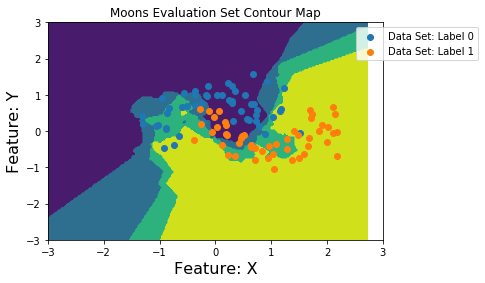

In [6]:
# Create data for contour map
observations_x = np.reshape(np_evaluation_X[:,0], [300,300])
observations_y = np.reshape(np_evaluation_X[:,1], [300,300])
observations_label = np.reshape(np_evaluation_predictions, [300,300])

# Plot contour map of evaluation set
plt.title("Moons Evaluation Set Contour Map")
plt.contourf(observations_x, observations_y, observations_label)
plt.scatter(np_moons[:50,1], np_moons[:50,2], label="Data Set: Label 0")
plt.scatter(np_moons[50:,1], np_moons[50:,2], label="Data Set: Label 1")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.xlim([-3, 3])
plt.xlabel("Feature: X", fontsize=16)
plt.ylim([-3, 3])
plt.ylabel("Feature: Y", fontsize=16)

##### Circles Data Set
#### a. Split the data set into training and testing sets

In [7]:
# Import csv to numpy array
np_circles = np.loadtxt(open('circles.csv', "rb"), delimiter=",", skiprows=1)

# Split the data set
train_X, test_X, train_y, test_y = train_test_split(np_circles[:,1:3], np_circles[:,0], stratify = np_circles[:,0])

##### b. Train the StandardScaler transformer on the training set. Use it to transform the features for the training and testing sets.

In [8]:
# Scale the data set
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

##### c. Fit a KNN model with 3 neighbors and using the mode function for aggregation on the training set

In [9]:
# Runn KNN
knn = KNN(3, "mode")
knn.fit(train_X, train_y)
np_circles_predictions = knn.predict(test_X)

# Sort by label
np_circles = np_circles[np.argsort(np_circles[:, 0])]

##### d. Evaluate the model for each point on a 2D grid. The grid should span from -3 to 3 on the x axis and -3 to 3 on the y axis with a point every 0.02 units.

Text(0, 0.5, 'Feature: Y')

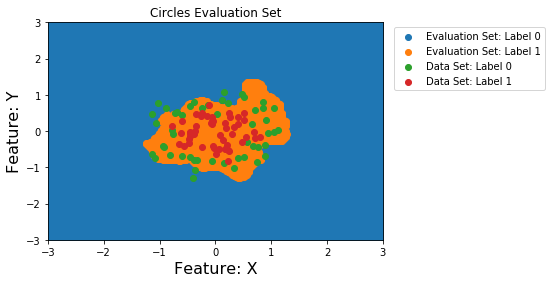

In [10]:
# Generate evaluation set
x = np.arange(-3, 3, 0.02)
x1, x2 = np.meshgrid(x,x)
np_evaluation_X = np.array([x1.flatten(), x2.flatten()]).T

# Scale the data set
np_evaluation_X = scaler.transform(np_evaluation_X)

# Runn KNN
np_evaluation_predictions = knn.predict(np_evaluation_X)

# Sort by label
np_evaluation_predictions = np_evaluation_predictions[:,np.newaxis]
np_evaluation = np.concatenate((np_evaluation_X, np_evaluation_predictions), 1)
np_evaluation = np_evaluation[np.argsort(np_evaluation[:, 2])]

# Plot evaluation set
plt.title("Circles Evaluation Set")
evaluation_sorted_index = np.where(np_evaluation[:,2]==1)[0][0]
circles_sorted_index = np.where(np_circles[:,0]==1)[0][0]
plt.scatter(np_evaluation[:evaluation_sorted_index,0], np_evaluation[:evaluation_sorted_index,1], label="Evaluation Set: Label 0")
plt.scatter(np_evaluation[evaluation_sorted_index:,0], np_evaluation[evaluation_sorted_index:,1], label="Evaluation Set: Label 1")
plt.scatter(np_circles[:circles_sorted_index,1], np_circles[:circles_sorted_index,2], label="Data Set: Label 0")
plt.scatter(np_circles[circles_sorted_index:,1], np_circles[circles_sorted_index:,2], label="Data Set: Label 1")
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
plt.xlim([-3, 3])
plt.xlabel("Feature: X", fontsize=16)
plt.ylim([-3, 3])
plt.ylabel("Feature: Y", fontsize=16)

##### e. Plot the predicted values using matplotlib.pyplot.contourf(). On the same plot, create a scatter plot of data points colored by class. 

Text(0, 0.5, 'Feature: Y')

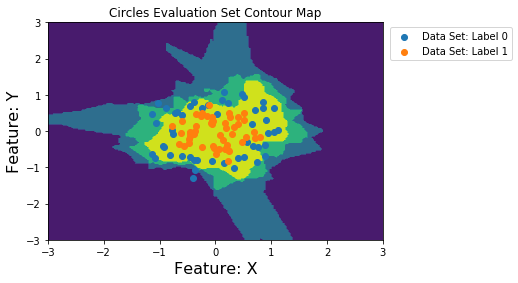

In [11]:
# Create data for contour map
observations_x = np.reshape(np_evaluation_X[:,0], [300,300])
observations_y = np.reshape(np_evaluation_X[:,1], [300,300])
observations_label = np.reshape(np_evaluation_predictions, [300,300])

# Plot contour map of evaluation set
plt.title("Circles Evaluation Set Contour Map")
plt.contourf(observations_x, observations_y, observations_label)
plt.scatter(np_circles[:circles_sorted_index,1], np_circles[:circles_sorted_index,2], label="Data Set: Label 0")
plt.scatter(np_circles[circles_sorted_index:,1], np_circles[circles_sorted_index:,2], label="Data Set: Label 1")
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1))
plt.xlim([-3, 3])
plt.xlabel("Feature: X", fontsize=16)
plt.ylim([-3, 3])
plt.ylabel("Feature: Y", fontsize=16)

##### Rocky Ridge Data Set
#### a. Split the data set into training and testing sets

In [12]:
# Import csv to numpy array
np_rocky = np.loadtxt(open('rocky_ridge.csv', "rb"), delimiter=",", skiprows=1)

# Split the data set
train_X, test_X, train_y, test_y = train_test_split(np_rocky[:,1:3], np_rocky[:,0], stratify = np_rocky[:,0])

##### b. Train the StandardScaler transformer on the training set. Use it to transform the features for the training and testing sets.

In [13]:
# Scale the data set
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

##### c. Fit a KNN model with 3 neighbors and using the mode function for aggregation on the training set

In [14]:
# Runn KNN
knn = KNN(3, "mode")
knn.fit(train_X, train_y)
np_rocky_predictions = knn.predict(test_X)

# Sort by label
np_rocky = np_rocky[np.argsort(np_rocky[:, 0])]

##### d. Evaluate the model for each point on a 2D grid. The grid should span from -3 to 3 on the x axis and -3 to 3 on the y axis with a point every 0.02 units.

Text(0, 0.5, 'Feature: Y')

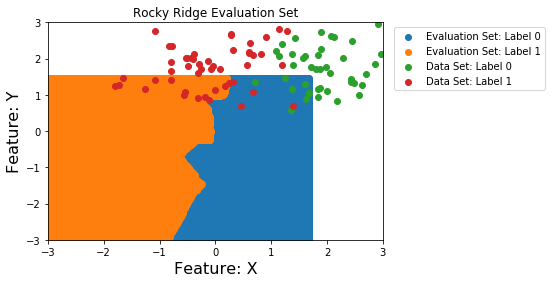

In [15]:
# Generate evaluation set
x = np.arange(-3, 3, 0.02)
x1, x2 = np.meshgrid(x,x)
np_evaluation_X = np.array([x1.flatten(), x2.flatten()]).T

# Scale the data set
np_evaluation_X = scaler.transform(np_evaluation_X)

# Runn KNN
np_evaluation_predictions = knn.predict(np_evaluation_X)

# Sort by label
np_evaluation_predictions = np_evaluation_predictions[:,np.newaxis]
np_evaluation = np.concatenate((np_evaluation_X, np_evaluation_predictions), 1)
np_evaluation = np_evaluation[np.argsort(np_evaluation[:, 2])]

# Plot evaluation set
plt.title("Rocky Ridge Evaluation Set")
evaluation_sorted_index = np.where(np_evaluation[:,2]==1)[0][0]
rocky_sorted_index = np.where(np_rocky[:,0]==1)[0][0]
plt.scatter(np_evaluation[:evaluation_sorted_index,0], np_evaluation[:evaluation_sorted_index,1], label="Evaluation Set: Label 0")
plt.scatter(np_evaluation[evaluation_sorted_index:,0], np_evaluation[evaluation_sorted_index:,1], label="Evaluation Set: Label 1")
plt.scatter(np_rocky[:rocky_sorted_index,1], np_rocky[:rocky_sorted_index,2], label="Data Set: Label 0")
plt.scatter(np_rocky[rocky_sorted_index:,1], np_rocky[rocky_sorted_index:,2], label="Data Set: Label 1")
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
plt.xlim([-3, 3])
plt.xlabel("Feature: X", fontsize=16)
plt.ylim([-3, 3])
plt.ylabel("Feature: Y", fontsize=16)

##### e. Plot the predicted values using matplotlib.pyplot.contourf(). On the same plot, create a scatter plot of data points colored by class. 

Text(0, 0.5, 'Feature: Y')

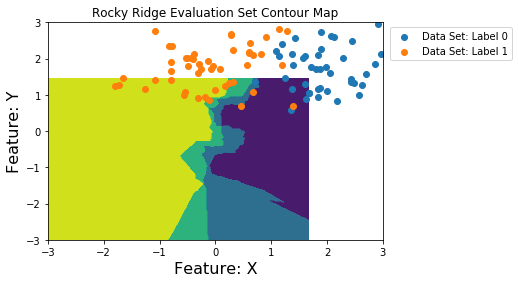

In [16]:
# Create data for contour map
observations_x = np.reshape(np_evaluation_X[:,0], [300,300])
observations_y = np.reshape(np_evaluation_X[:,1], [300,300])
observations_label = np.reshape(np_evaluation_predictions, [300,300])

# Plot contour map of evaluation set
plt.title("Rocky Ridge Evaluation Set Contour Map")
plt.contourf(observations_x, observations_y, observations_label)
plt.scatter(np_rocky[:rocky_sorted_index,1], np_rocky[:rocky_sorted_index,2], label="Data Set: Label 0")
plt.scatter(np_rocky[rocky_sorted_index:,1], np_rocky[rocky_sorted_index:,2], label="Data Set: Label 1")
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1))
plt.xlim([-3, 3])
plt.xlabel("Feature: X", fontsize=16)
plt.ylim([-3, 3])
plt.ylabel("Feature: Y", fontsize=16)

### Choosing an Optimal Value for k


Text(0, 0.5, 'Accuracy')

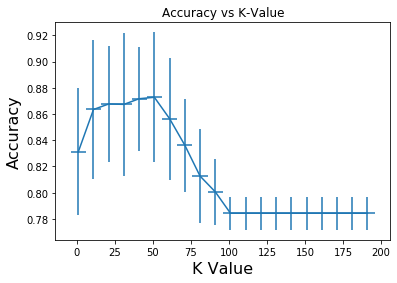

In [17]:
# Import csv to numpy array
np_sweep = np.loadtxt(open('sweep.csv', "rb"), delimiter=",", skiprows=1)
np_sweep_features = np_sweep[:,1:3]
np_sweep_labels = np_sweep[:,0]

skf = StratifiedKFold(n_splits=10, shuffle=True)

np_mean = np.zeros(20)
np_stdev = np.zeros(20)
np_k = np.zeros(20)
for k_val in range(1,200,10):
    if k_val % 2 == 1:
        accuracy = np.zeros(10)
        i = 0
        for train_index, test_index in skf.split(np_sweep_features, np_sweep_labels):
            # Split the data set
            X_train, X_test = np_sweep_features[train_index], np_sweep_features[test_index]
            y_train, y_test = np_sweep_labels[train_index], np_sweep_labels[test_index]
            
            # Train KNN model
            knn = KNN(k_val, "mode")
            knn.fit(X_train, y_train)
            
            accuracy[i] = accuracy_score(y_test, knn.predict(X_test).round())
            i += 1
        np_mean[int(k_val/10)] = np.mean(accuracy)
        np_stdev[int(k_val/10)] = np.std(accuracy)
        np_k[int(k_val/10)] = k_val
     
    
# Plot Error Graph
plt.title("Accuracy vs K-Value")
plt.errorbar(np_k, np_mean, xerr = 5, yerr = np_stdev)
#plt.errorbar(np_k, np_stdev, xerr = 0.4, yerr = 0.5, label = "Standard Deviation")
plt.xlabel("K Value", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)